importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Load the data

In [5]:
data=pd.read_csv("index.csv")

Exploring the data

In [7]:
data.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [9]:
data.tail(5)

,date,datetime,cash_type,card,money,coffee_name
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [9]:
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [13]:
data.shape

(1133, 6)

In [11]:
data.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [13]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [15]:
# Descriptive statistics
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


Data Preprocessing

In [18]:
#Checking for missing valuees
missing_values=data.isnull().sum()

In [20]:
missing_percentage = (missing_values / len(data)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

             Missing Values  Percentage
date                      0    0.000000
datetime                  0    0.000000
cash_type                 0    0.000000
card                     89    7.855252
money                     0    0.000000
coffee_name               0    0.000000


In [22]:
# Replace null values with a placeholder
data['card']=data['card'].fillna('UNKNOWN')


In [24]:
#Checking for duplicate values
data.duplicated().sum()

0

In [26]:
# Convert data type
data['datetime'] = pd.to_datetime(data['datetime'])

In [28]:
data.dtypes

date                   object
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [30]:
# Check for Outliers
# for numeric columns
print(data['money'].describe())


count    1133.000000
mean       33.105808
std         5.035366
min        18.120000
25%        28.900000
50%        32.820000
75%        37.720000
max        40.000000
Name: money, dtype: float64


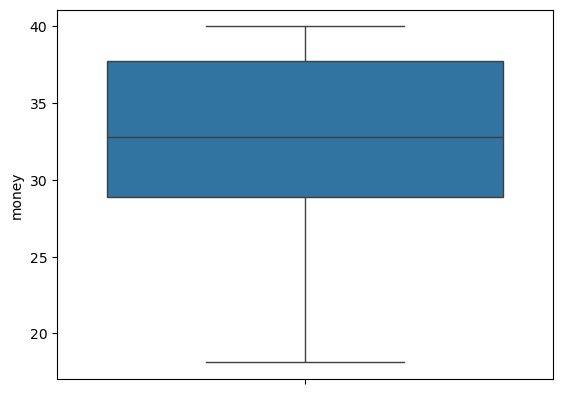

In [32]:
sns.boxplot(data['money'])
plt.show()


In [34]:
# Check for inconsistent values in categorical columns
print(data['cash_type'].unique())
print(data['coffee_name'].unique())


['card' 'cash']
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [36]:
# Correct typos
data['cash_type'] = data['cash_type'].str.lower()


In [38]:
# check for mismatch
data['date'] = pd.to_datetime(data['date'])
mismatch_count = (data['datetime'].dt.date != data['date']).sum()
print(f"Mismatched date records: {mismatch_count}")


Mismatched date records: 0


In [40]:
# Check for invalid cash
invalid_money = data[data['money'] <= 0]
print(invalid_money)


Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []


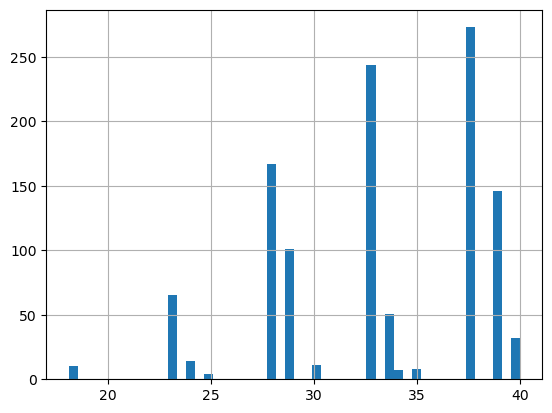

In [42]:
#check for uneven data distribution
data['money'].hist(bins=50)
plt.show()


In [44]:
# Check frequency distribution
print(data['coffee_name'].value_counts())


coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


In [46]:
# Known expected values
expected_coffee_names = ['Espresso', 'Latte', 'Cappuccino', 'Americano', 'Mocha']
expected_cash_types = ['cash', 'card']


In [48]:
# Unique values in the dataset
actual_coffee_names = data['coffee_name'].unique()
actual_cash_types = data['cash_type'].unique()

print("Actual coffee names:", actual_coffee_names)
print("Actual cash types:", actual_cash_types)


Actual coffee names: ['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Actual cash types: ['card' 'cash']


In [50]:
# Compare coffee_name
missing_coffee_names = [name for name in expected_coffee_names if name not in actual_coffee_names]
unexpected_coffee_names = [name for name in actual_coffee_names if name not in expected_coffee_names]

print("Missing coffee names:", missing_coffee_names)
print("Unexpected coffee names:", unexpected_coffee_names)

# Compare cash_type
missing_cash_types = [ctype for ctype in expected_cash_types if ctype not in actual_cash_types]
unexpected_cash_types = [ctype for ctype in actual_cash_types if ctype not in expected_cash_types]

print("Missing cash types:", missing_cash_types)
print("Unexpected cash types:", unexpected_cash_types)


Missing coffee names: ['Mocha']
Unexpected coffee names: ['Hot Chocolate', 'Americano with Milk', 'Cocoa', 'Cortado']
Missing cash types: []
Unexpected cash types: []


Exploratory Data Analysis

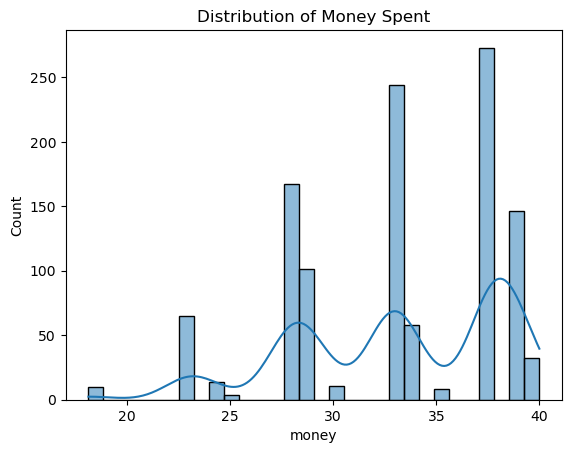

In [53]:
# Analyse Individual Variables
# Numerical column

#Distribution
sns.histplot(data['money'], bins=30, kde=True)
plt.title("Distribution of Money Spent")
plt.show()

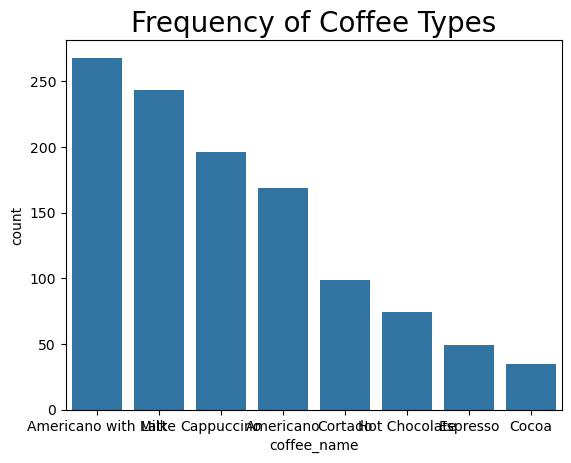

<Figure size 2000x800 with 0 Axes>

In [55]:
# Categorical
sns.countplot(data=data, x='coffee_name', order=data['coffee_name'].value_counts().index)
plt.title("Frequency of Coffee Types", fontsize=20)
plt.figure(figsize=(20, 8))
plt.show()


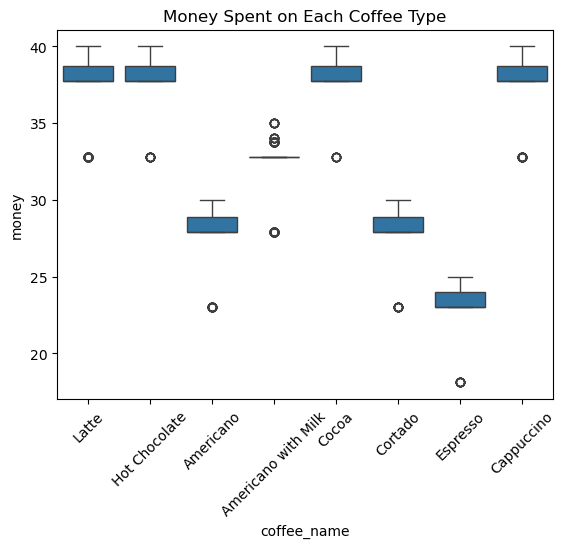

In [57]:
# Categorical-Numeric Relationships
# Boxplots
sns.boxplot(data=data, x='coffee_name', y='money')
plt.title("Money Spent on Each Coffee Type")
plt.xticks(rotation=45)
plt.show()


In [59]:
# Groupwise Aggregation
coffee_stats = data.groupby('coffee_name')['money'].agg(['mean', 'sum', 'count'])
print(coffee_stats)


                          mean      sum  count
coffee_name                                   
Americano            27.482485  4644.54    169
Americano with Milk  32.096791  8601.94    268
Cappuccino           37.413980  7333.14    196
Cocoa                37.026857  1295.94     35
Cortado              27.728081  2745.08     99
Espresso             22.461633  1100.62     49
Hot Chocolate        37.547027  2778.48     74
Latte                37.074650  9009.14    243


In [61]:
# Category-Numerical raletionship
# Cross tabulation
cross_tab = pd.crosstab(data['coffee_name'], data['cash_type'])
print(cross_tab)


cash_type            card  cash
coffee_name                    
Americano             155    14
Americano with Milk   253    15
Cappuccino            181    15
Cocoa                  31     4
Cortado                94     5
Espresso               44     5
Hot Chocolate          68     6
Latte                 218    25


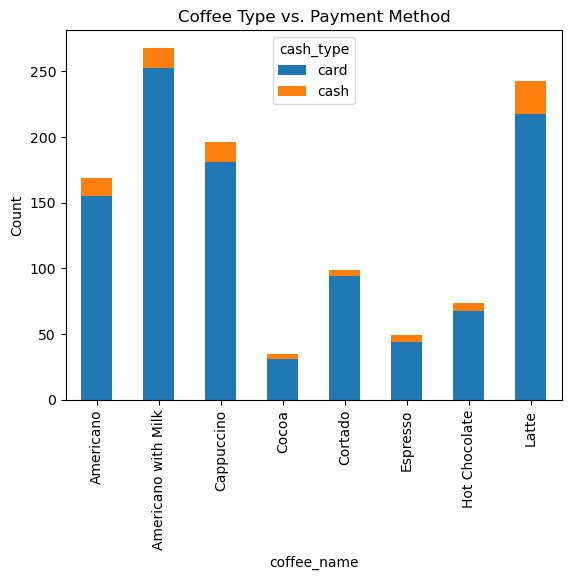

In [63]:
cross_tab.plot(kind='bar', stacked=True)
plt.title("Coffee Type vs. Payment Method")
plt.ylabel("Count")
plt.show()


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [67]:
# One-hot encoding for 'coffee_name' and 'cash_type'
data = pd.get_dummies(data, columns=['coffee_name', 'cash_type'], drop_first=True)

In [69]:
# List of boolean columns
boolean_columns = ['coffee_name_Americano with Milk','coffee_name_Cappuccino','coffee_name_Cocoa','coffee_name_Cortado','coffee_name_Espresso','coffee_name_Hot Chocolate','coffee_name_Latte','cash_type_cash']  # Replace with your actual boolean columncoffee_name_Americano with Milk	coffee_name_Cappuccino	coffee_name_Cocoa	coffee_name_Cortado	coffee_name_Espresso	coffee_name_Hot Chocolate	coffee_name_Latte	cash_type_cash names

# Convert each boolean column to 0 and 1
for col in boolean_columns:
    data[col] = data[col].astype(int)

# Check the changes
print(data[boolean_columns].head())


   coffee_name_Americano with Milk  coffee_name_Cappuccino  coffee_name_Cocoa  \
0                                0                       0                  0   
1                                0                       0                  0   
2                                0                       0                  0   
3                                0                       0                  0   
4                                0                       0                  0   

   coffee_name_Cortado  coffee_name_Espresso  coffee_name_Hot Chocolate  \
0                    0                     0                          0   
1                    0                     0                          1   
2                    0                     0                          1   
3                    0                     0                          0   
4                    0                     0                          0   

   coffee_name_Latte  cash_type_cash  
0                  1   

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the 'card' column into numeric labels
data['card_encoded'] = encoder.fit_transform(data['card'])

# Check the new encoded column
print(data[['card', 'card_encoded']].head())


                  card  card_encoded
0  ANON-0000-0000-0001             0
1  ANON-0000-0000-0002             1
2  ANON-0000-0000-0002             1
3  ANON-0000-0000-0003             2
4  ANON-0000-0000-0004             3


In [73]:
data['day_of_month'] = data['datetime'].dt.day


In [75]:
data['hour'] = data['datetime'].dt.hour


In [77]:
data['minute'] = data['datetime'].dt.minute


In [79]:
data['day_of_week'] = data['date'].dt.dayofweek


In [81]:
data['month'] = data['date'].dt.month


In [96]:
data['year'] = data['date'].dt.year


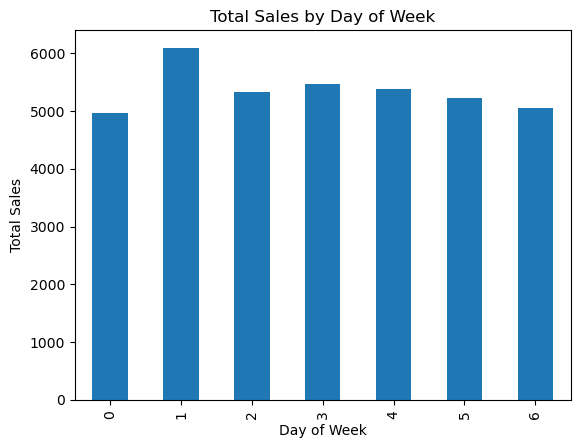

In [83]:
sales_by_day = data.groupby('day_of_week')['money'].sum()
sales_by_day.plot(kind='bar', title="Total Sales by Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


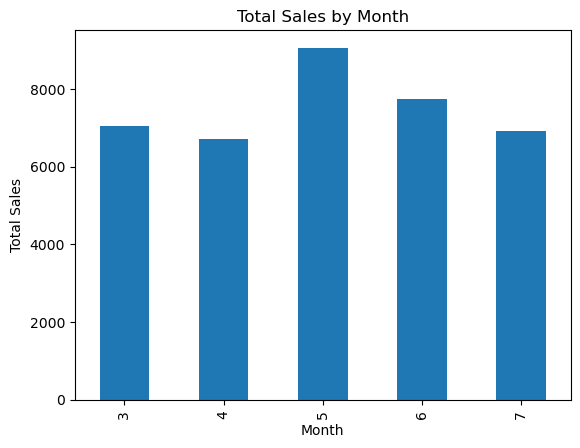

In [85]:
sales_by_month = data.groupby('month')['money'].sum()
sales_by_month.plot(kind='bar', title="Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


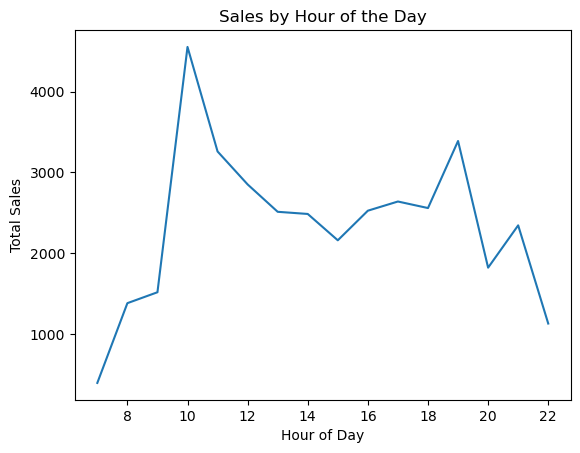

In [87]:
sales_by_hour = data.groupby('hour')['money'].sum()
sales_by_hour.plot(kind='line', title="Sales by Hour of the Day")
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()


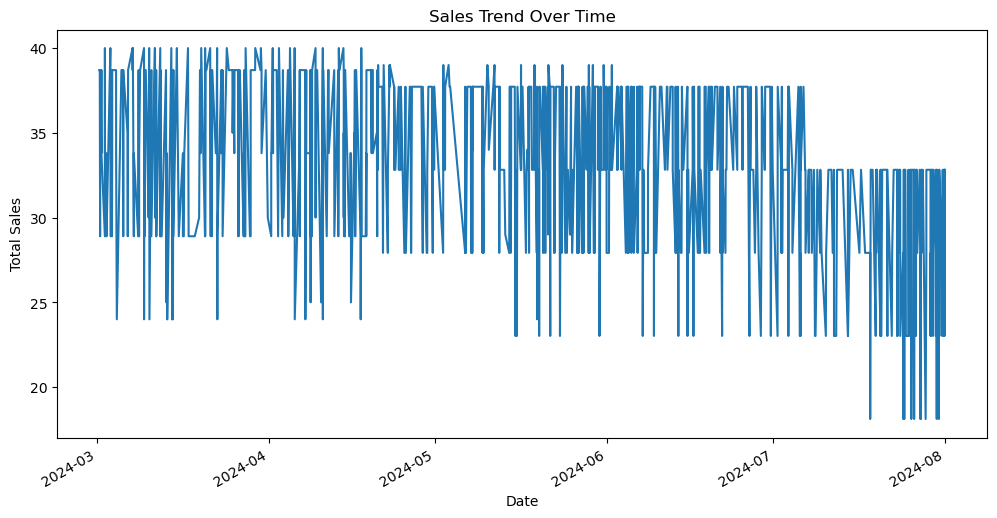

In [89]:
# Group by day
sales_by_day = data.groupby('datetime')['money'].sum()

# Plot sales trend over time
sales_by_day.plot(kind='line', figsize=(12, 6), title="Sales Trend Over Time")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


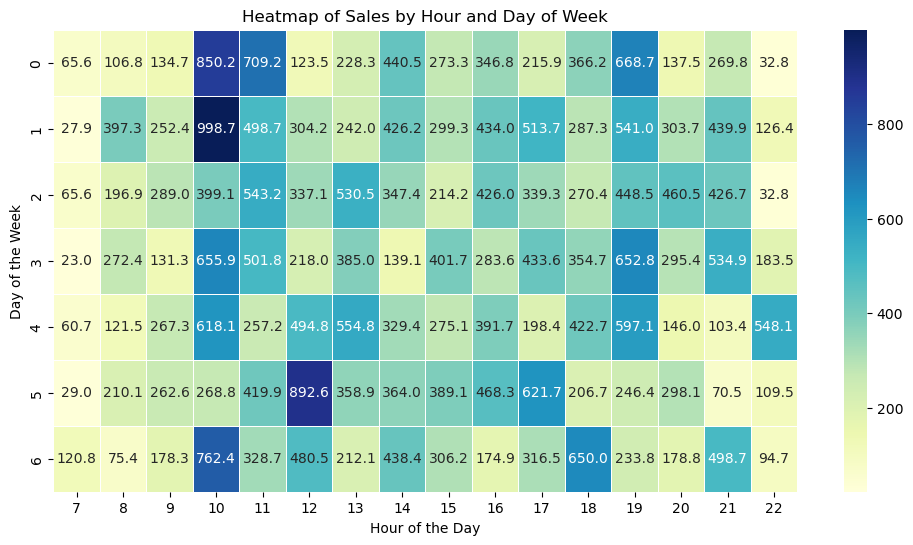

In [91]:
import seaborn as sns

# Pivot the data to create a heatmap-friendly format
heatmap_data = data.pivot_table(index='day_of_week', columns='hour', values='money', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Sales by Hour and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [93]:
data = data.drop(columns=['date', 'card'])  # Drop unnecessary columns


In [95]:
data.head()

,datetime,money,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,cash_type_cash,card_encoded,day_of_month,hour,minute,day_of_week,month
0,2024-03-01 10:15:50.520,38.7,0,0,0,0,0,0,1,0,0,1,10,15,4,3
1,2024-03-01 12:19:22.539,38.7,0,0,0,0,0,1,0,0,1,1,12,19,4,3
2,2024-03-01 12:20:18.089,38.7,0,0,0,0,0,1,0,0,1,1,12,20,4,3
3,2024-03-01 13:46:33.006,28.9,0,0,0,0,0,0,0,0,2,1,13,46,4,3
4,2024-03-01 13:48:14.626,38.7,0,0,0,0,0,0,1,0,3,1,13,48,4,3


In [97]:
data['datetime_timestamp'] = data['datetime'].astype(np.int64) // 10**9
data= data.drop(columns=['datetime'])

In [99]:
data.head()

,money,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,cash_type_cash,card_encoded,day_of_month,hour,minute,day_of_week,month,datetime_timestamp
0,38.7,0,0,0,0,0,0,1,0,0,1,10,15,4,3,1709288150
1,38.7,0,0,0,0,0,1,0,0,1,1,12,19,4,3,1709295562
2,38.7,0,0,0,0,0,1,0,0,1,1,12,20,4,3,1709295618
3,28.9,0,0,0,0,0,0,0,0,2,1,13,46,4,3,1709300793
4,38.7,0,0,0,0,0,0,1,0,3,1,13,48,4,3,1709300894


Feature Scaling

In [118]:
from sklearn.preprocessing import StandardScaler

# Define the numerical features to scale
numerical_columns = ['money', 'day_of_week', 'month', 'day_of_month', 'hour', 'minute','datetime_timestamp']

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [120]:
X = data.drop(columns=['money'])  # Features
y = data['money']  # Target


In [122]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [126]:
# Evaluate the model
y_pred = model.predict(X_test)

In [128]:
# Display model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for easy interpretation
feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print(coef_df)


                            Feature  Coefficient
0   coffee_name_Americano with Milk     1.003843
1            coffee_name_Cappuccino     2.000291
2                 coffee_name_Cocoa     1.960334
3               coffee_name_Cortado     0.016977
4              coffee_name_Espresso    -0.940091
5         coffee_name_Hot Chocolate     1.952656
6                 coffee_name_Latte     1.976093
7                    cash_type_cash     0.301755
8                      card_encoded    -0.000193
9                      day_of_month    -4.772863
10                             hour    -0.063498
11                           minute     0.008465
12                      day_of_week     0.000019
13                            month   -22.717214
14               datetime_timestamp    23.538692
